# 2D Fracture Voxelization and Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from scipy.ndimage import distance_transform_edt
from pysimfrac import SimFrac

## Helper functions

In [2]:
def calc_ap(frac_3D):
    """Calculate Mean Aperture of a Slice

    Parameters
    -------------
        frac_3D : np.array
            3D numpy array representing the fracture. The value '1' in the array indicates the presence of a fracture.

    Returns
    ------------
        float
            Mean aperture of the first slice. It is calculated as the fraction of cells with a fracture (value of 1) in the first slice.

    Notes
    ---------
        This function calculates the mean aperture of the first slice in the 3D array. It assumes all slices have the same aperture properties.
    """
    return np.sum(frac_3D[0,]==1)/frac_3D.shape[0]


def smallest_throat(frac_3D):
    """Calculate Size of the Smallest Constriction (Throat) 

    Parameters
    -------------
        frac_3D : np.array
            3D numpy array representing the fracture. 

    Returns
    ------------
        int
            Size of the smallest constriction or "throat" in the fracture.

    Notes
    ---------
        This function calculates the size of the smallest constriction, also known as a "throat", in the 3D array.
        It does so by multiplying the first slice of the array by a linear gradient and then counting the occurrences of unique values.
        A visualization of the multiplied slice is displayed using `plt.imshow`.
        An assertion is used to ensure that the fracture is connected by checking that the number of unique counts matches the slice size.
    """
    linear = np.arange( 0,frac_3D.shape[0] )*frac_3D[0,].T # multiplies frac times a linear gradient
    plt.imshow(linear)
    _, count = np.unique(linear, return_counts=True) # count the number of occurences of unique numbers
    assert count.size == frac_3D.shape[0] # this makes sure that it's connected
    return np.min(count)  # returns the size of the smallest "throat"

In [3]:
%%capture
myfrac = SimFrac( h = 0.01, lx = 1.28, ly = 1.28, method = "spectral")

myfrac.params['aniso']['value'] = 0.0
myfrac.params['H']['value'] = 0.7
myfrac.params['roughness']['value'] = 5
myfrac.params['mismatch']['value'] = 0.25
myfrac.params['model']['value'] = 'smooth'
myfrac.params['seed']['value'] = 1
myfrac.params['mean-aperture']['value'] = 128//3
myfrac.create_fracture()

# create a sheared fracture
myfrac2 = deepcopy(myfrac)
myfrac2.shear = 0.4
myfrac2.apply_shear()

## Create 2D fracture surfaces

In [4]:
%%capture
ind_slice = 49 # tile along this index

# -> frac 1
myfrac.generate_2D(ind=ind_slice)
myfrac.voxelize(target_size=128) 

# -> frac 2
myfrac2.generate_2D(ind=ind_slice)
myfrac2.voxelize(target_size=128) 

## Making sure that our 2D fractures are complaint

In [5]:
min_throat = 20

In [6]:
print(f'The mean aperture of the fracture 1 is {calc_ap(myfrac.frac_3D)}') 

The mean aperture of the fracture 1 is 42.921875


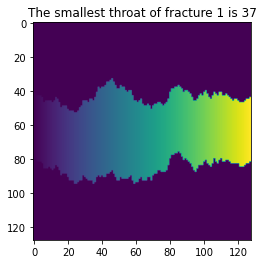

In [7]:
throat = smallest_throat(myfrac.frac_3D)
plt.title(f'The smallest throat of fracture 1 is {throat}')
assert throat>min_throat

The mean aperture of fracture 2 is 42.9453125


Text(0.5, 1.0, 'The smallest throat of fracture 2 is 30')

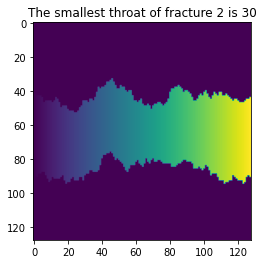

In [8]:
print(f'The mean aperture of fracture 2 is {calc_ap(myfrac2.frac_3D)}')
throat = smallest_throat(myfrac2.frac_3D)
assert throat>min_throat
plt.title(f'The smallest throat of fracture 2 is {throat}')

--> Setting mean aperture value to 25
--> Projecting surfaces to 2D aperture field
--> Complete
--> Complete
--> Checking aperture values
--> Complete
--> Setting minimum surface value of bottom to 0
--> Complete
The mean aperture of the fracture  is 25.921875


Text(0.5, 1.0, 'The smallest throat of the fracture 3 is 20')

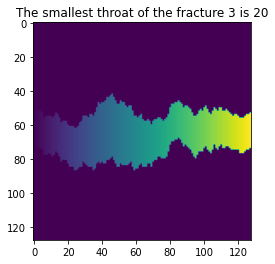

In [9]:
myfrac.set_mean_aperture(128//5); 
myfrac.voxelize(target_size=128);
print(f'The mean aperture of the fracture  is {calc_ap(myfrac.frac_3D)}')
throat = smallest_throat(myfrac.frac_3D)
plt.title(f'The smallest throat of the fracture 3 is {throat}')

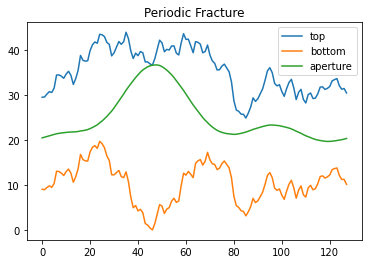

In [10]:
plt.plot(myfrac.top[64,].squeeze().T, label='top')
plt.plot(myfrac.bottom[64,].squeeze().T,  label='bottom')
plt.plot(myfrac.top[64,].squeeze().T-myfrac.bottom[64,].squeeze().T,  label='aperture')
plt.title('Periodic Fracture')
plt.legend()